In [99]:
pip install tensorflow_decision_forests 

Note: you may need to restart the kernel to use updated packages.


In [100]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [101]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.19.0
TensorFlow Decision Forests v1.12.0


In [102]:
train_file_path = "../data/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [103]:
dataset_df.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [104]:
dataset_df = dataset_df.drop('Id', axis=1)

In [105]:
dataset_df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [106]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_49837/3430012634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


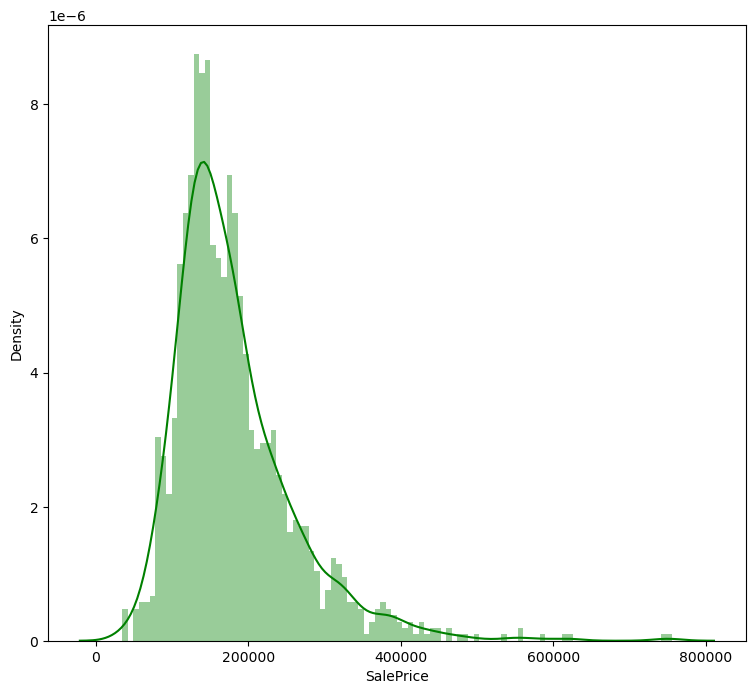

In [107]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [108]:
list(set(dataset_df.dtypes.tolist()))


[dtype('float64'), dtype('int64'), dtype('O')]

In [109]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [110]:
df_num.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

<Axes: >

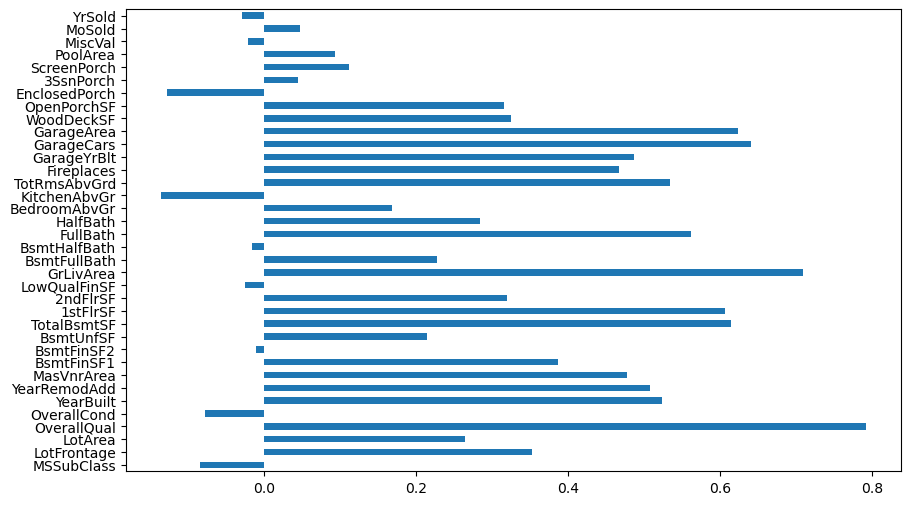

In [111]:
correlation_values = df_num.corr()["SalePrice"].drop("SalePrice")
correlation_values.plot(kind='barh', figsize=(10, 6))

In [112]:
dataset_df['MSSubClass'] = dataset_df['MSSubClass'].astype(str)
dataset_df['OverallQual'] = dataset_df['OverallQual'].astype(str)
dataset_df['OverallCond'] = dataset_df['OverallCond'].astype(str)
dataset_df['YearBuilt'] = dataset_df['YearBuilt'].astype(str)
dataset_df['YearRemodAdd'] = dataset_df['YearRemodAdd'].astype(str)
dataset_df['BsmtFullBath'] = dataset_df['BsmtFullBath'].astype(str)
dataset_df['BsmtHalfBath'] = dataset_df['BsmtHalfBath'].astype(str)
dataset_df['FullBath'] = dataset_df['FullBath'].astype(str)
dataset_df['HalfBath'] = dataset_df['HalfBath'].astype(str)
dataset_df['BedroomAbvGr'] = dataset_df['BedroomAbvGr'].astype(str)
dataset_df['KitchenAbvGr'] = dataset_df['KitchenAbvGr'].astype(str)
dataset_df['TotRmsAbvGrd'] = dataset_df['TotRmsAbvGrd'].astype(str)
dataset_df['Fireplaces'] = dataset_df['KitchenAbvGr'].astype(str)
dataset_df['GarageCars'] = dataset_df['GarageCars'].astype(str)
dataset_df['MoSold'] = dataset_df['MoSold'].astype(str)
dataset_df['YrSold'] = dataset_df['YrSold'].astype(str)

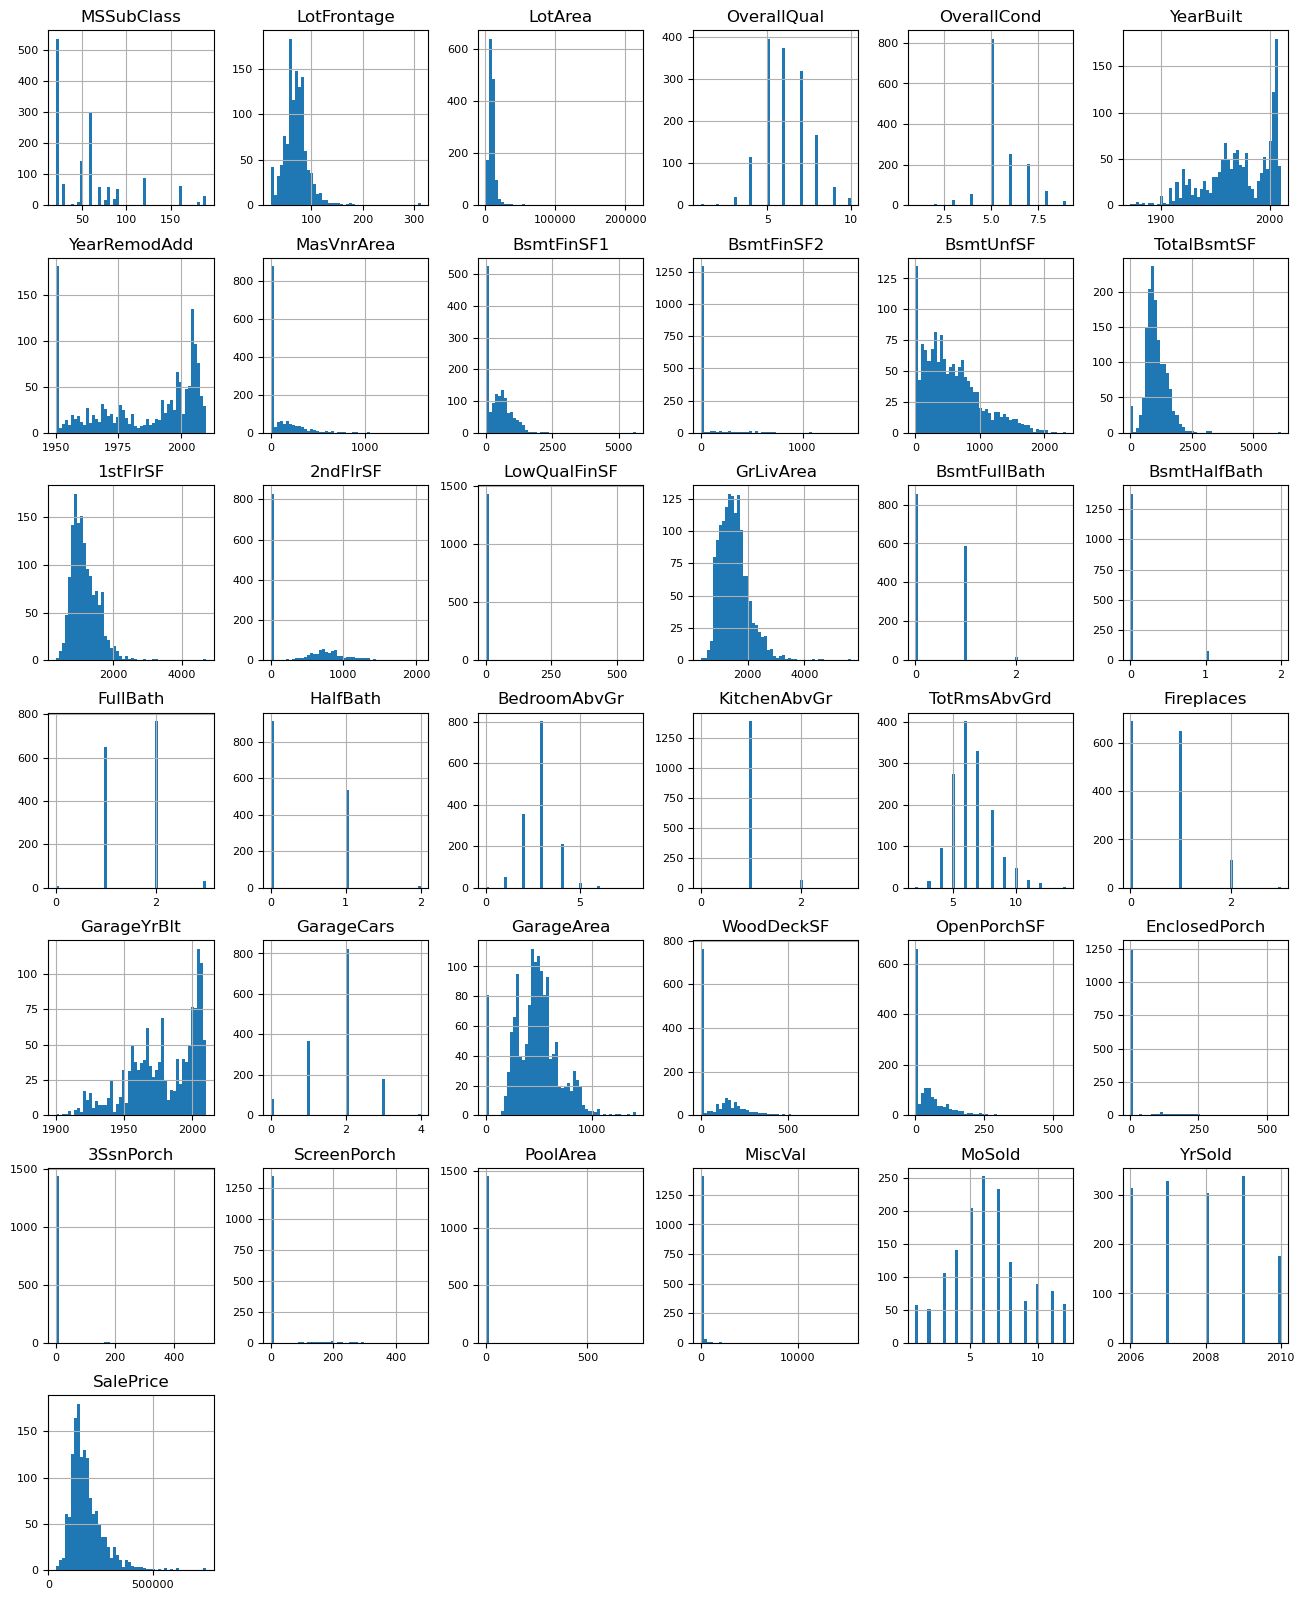

In [113]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [114]:
from sklearn.preprocessing import normalize, StandardScaler

In [115]:
dataset_df = dataset_df.dropna(subset=['GarageYrBlt', 'MasVnrArea', 'SalePrice'])
# dataset_df = dataset_df[dataset_df['MasVnrArea'].isna()==0]
# dataset_df = dataset_df[dataset_df['SalePrice'].isna()==0]
dataset_df['LotFrontage'] = dataset_df['LotFrontage'].fillna(dataset_df['LotFrontage'].median())
print("NaN values remaining:", dataset_df.isnull().sum().sum())

NaN values remaining: 6636


In [116]:
dataset_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [117]:
# df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])

In [118]:
# df_num = df_num[df_num['GarageYrBlt'].isna()==0]
# df_num = df_num[df_num['MasVnrArea'].isna()==0]
# # df_num

In [119]:
# df_num['LotFrontage'] = df_num['LotFrontage'].fillna(df_num['LotFrontage'].median())
# # df_num.isna().sum()

In [120]:
# print("NaN values remaining:", df_num.isna().sum().sum())

In [121]:
dataset_df = dataset_df.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu','PoolQC','Fence','MiscFeature'])

In [122]:
dataset_df['BsmtQual'] = dataset_df['BsmtQual'].replace(np.nan, dataset_df['BsmtQual'].value_counts().idxmax())
dataset_df['BsmtCond'] = dataset_df['BsmtCond'].replace(np.nan, dataset_df['BsmtCond'].value_counts().idxmax())
dataset_df['BsmtExposure'] = dataset_df['BsmtExposure'].replace(np.nan, dataset_df['BsmtExposure'].value_counts().idxmax())
dataset_df['BsmtFinType1'] = dataset_df['BsmtFinType1'].replace(np.nan, dataset_df['BsmtFinType1'].value_counts().idxmax())
dataset_df['BsmtFinType2'] = dataset_df['BsmtFinType2'].replace(np.nan, dataset_df['BsmtFinType2'].value_counts().idxmax())
dataset_df['Electrical'] = dataset_df['Electrical'].replace(np.nan, dataset_df['Electrical'].value_counts().idxmax())

In [123]:
dataset_df.select_dtypes(include = ['O']).isna().sum().sum()

0

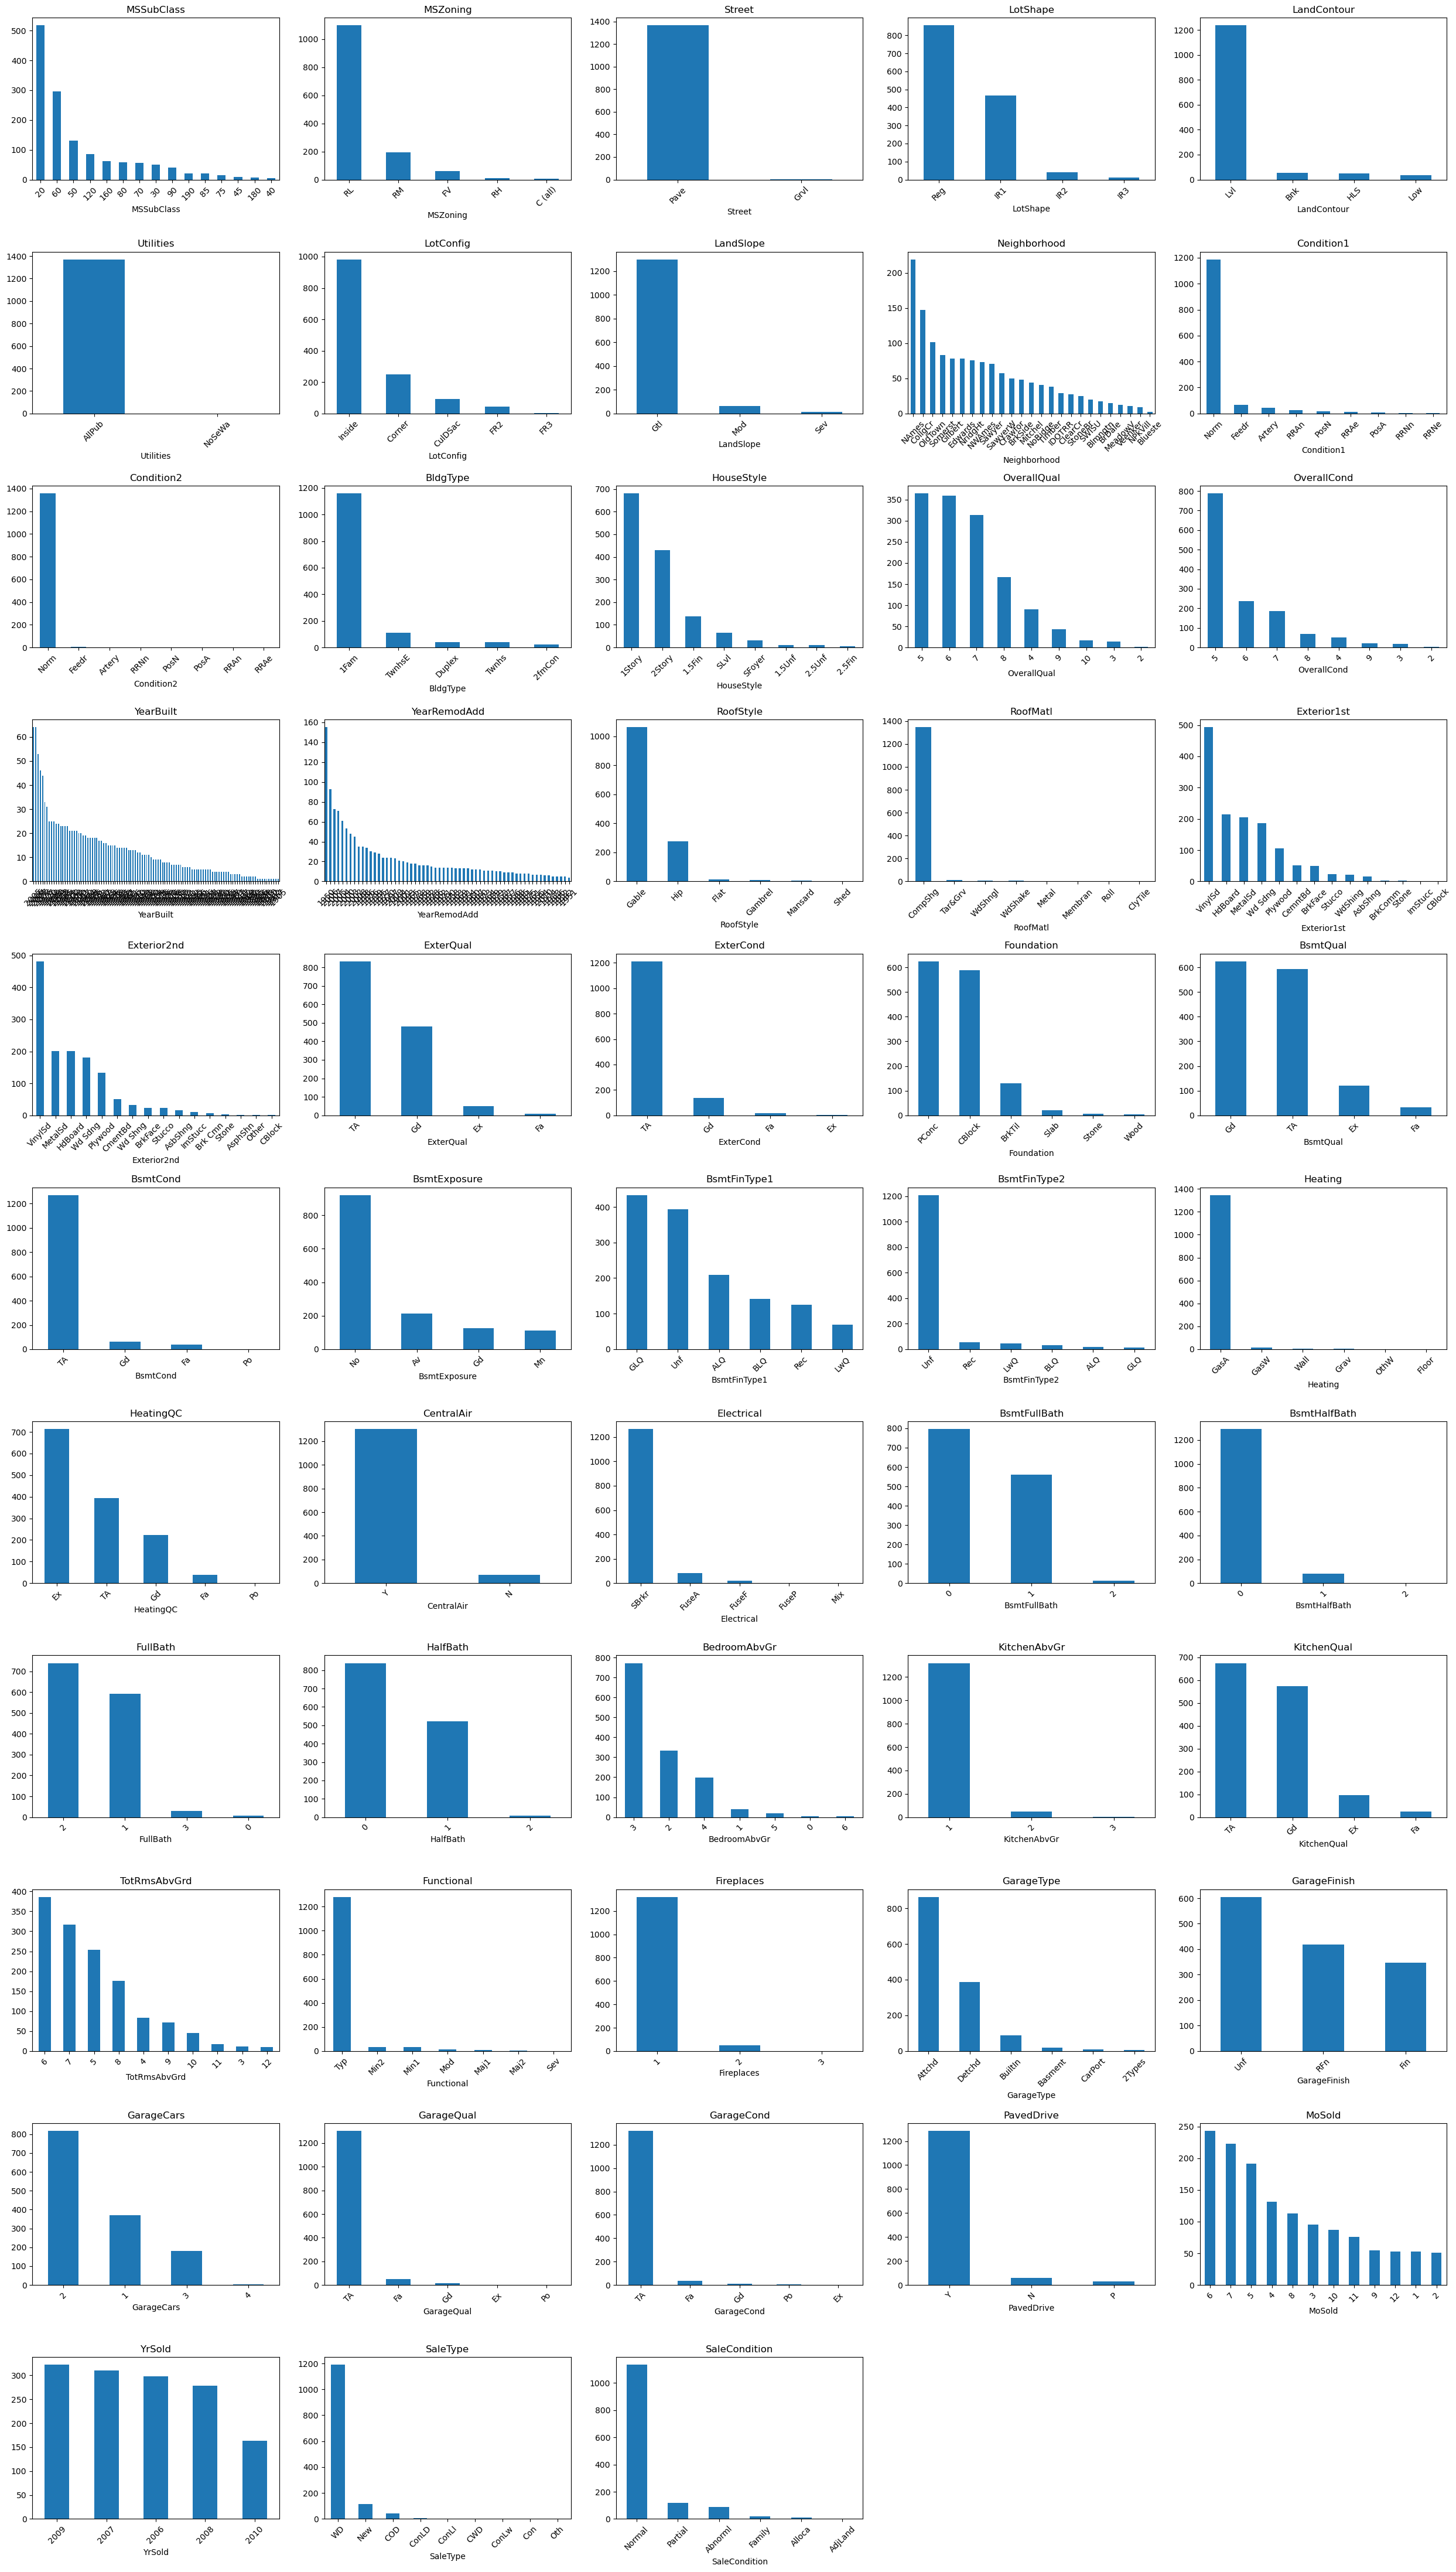

In [124]:
# dataset_df.select_dtypes(include = ['O']).plot.box(figsize=(16, 20));
cat_cols = dataset_df.select_dtypes(include=['object']).columns

# Déterminer la taille de la figure
n_cols = 5  # nombre de colonnes de subplots
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # nombre de lignes nécessaires

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

for i, col in enumerate(cat_cols):
    dataset_df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si cat_cols n'est pas multiple de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [125]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

975 examples in training, 396 examples in testing.


In [126]:
# from sklearn.model_selection import train_test_split

# X = dataset_df.drop("SalePrice", axis=1)
# y = dataset_df[['SalePrice']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [128]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [129]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp2xnztf1j as temporary training directory


In [130]:
# rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

In [131]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.827264. Found 975 examples.
Training model...


I0000 00:00:1756763578.835968   49837 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756763578.837150   49837 kernel.cc:783] Collect training examples
I0000 00:00:1756763578.837738   49837 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756763578.844593   49837 kernel.cc:401] Number of batches: 1
I0000 00:00:1756763578.844955   49837 kernel.cc:402] Number of examples: 975
I0000 00:00:1756763578.847022   49837 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BedroomAbvGr (6 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756763578.847155   49837 data_spec_inference.cc:354] 1 item(s) have been p

Model trained in 0:00:03.538432
Compiling model...


I0000 00:00:1756763582.319263   49837 decision_forest.cc:808] Model loaded with 300 root(s), 92970 node(s), and 70 input feature(s).
I0000 00:00:1756763582.319965   49837 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-09-01 21:53:02.320189: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


In [132]:
from IPython.display import HTML, display
import tensorflow_decision_forests as tfdf

# rf is your trained model
html = tfdf.model_plotter.plot_model(rf, tree_idx=0, max_depth=5)
display(HTML(html))

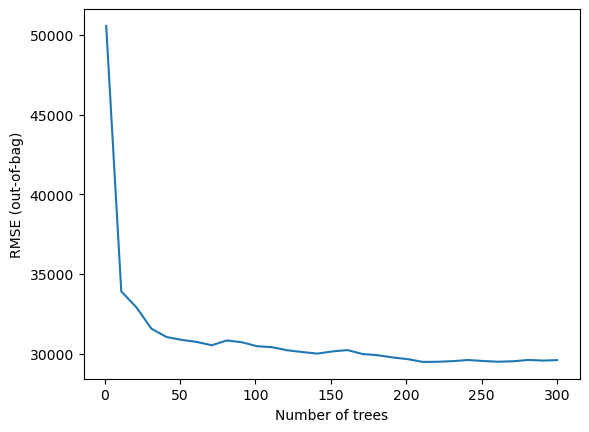

In [71]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [133]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=975, accuracy=None, loss=None, rmse=30815.982235613235, ndcg=None, aucs=None, auuc=None, qini=None)

In [79]:
inspector.features()

["1stFlrSF" (1; #0),
 "2ndFlrSF" (1; #1),
 "3SsnPorch" (1; #2),
 "BedroomAbvGr" (1; #3),
 "BldgType" (4; #4),
 "BsmtCond" (4; #5),
 "BsmtExposure" (4; #6),
 "BsmtFinSF1" (1; #7),
 "BsmtFinSF2" (1; #8),
 "BsmtFinType1" (4; #9),
 "BsmtFinType2" (4; #10),
 "BsmtFullBath" (1; #11),
 "BsmtHalfBath" (1; #12),
 "BsmtQual" (4; #13),
 "BsmtUnfSF" (1; #14),
 "CentralAir" (4; #15),
 "Condition1" (4; #16),
 "Condition2" (4; #17),
 "Electrical" (4; #18),
 "EnclosedPorch" (1; #19),
 "ExterCond" (4; #20),
 "ExterQual" (4; #21),
 "Exterior1st" (4; #22),
 "Exterior2nd" (4; #23),
 "Fireplaces" (1; #24),
 "Foundation" (4; #25),
 "FullBath" (1; #26),
 "Functional" (4; #27),
 "GarageArea" (1; #28),
 "GarageCars" (1; #29),
 "GarageCond" (4; #30),
 "GarageFinish" (4; #31),
 "GarageQual" (4; #32),
 "GarageType" (4; #33),
 "GarageYrBlt" (1; #34),
 "GrLivArea" (1; #35),
 "HalfBath" (1; #36),
 "Heating" (4; #37),
 "HeatingQC" (4; #38),
 "HouseStyle" (4; #39),
 "KitchenAbvGr" (1; #40),
 "KitchenQual" (4; #41),
 "

In [134]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 393ms/step - loss: 0.0000e+00 - mse: 925651968.0000
loss: 0.0000
mse: 925651968.0000


In [74]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [75]:
inspector.variable_importances()["NUM_AS_ROOT"]


[("OverallQual" (1; #57), 176.0),
 ("GarageCars" (1; #29), 58.0),
 ("GrLivArea" (1; #35), 26.0),
 ("1stFlrSF" (1; #0), 23.0),
 ("TotalBsmtSF" (1; #67), 22.0),
 ("GarageArea" (1; #28), 21.0),
 ("FullBath" (1; #26), 18.0),
 ("LotArea" (1; #44), 16.0),
 ("GarageYrBlt" (1; #34), 15.0),
 ("YearRemodAdd" (1; #71), 15.0),
 ("MiscVal" (1; #52), 14.0),
 ("PoolArea" (1; #59), 13.0),
 ("3SsnPorch" (1; #2), 12.0),
 ("YearBuilt" (1; #70), 12.0),
 ("KitchenAbvGr" (1; #40), 11.0),
 ("ExterQual" (4; #21), 10.0),
 ("MasVnrArea" (1; #51), 10.0),
 ("TotRmsAbvGrd" (1; #66), 10.0),
 ("BsmtFinSF1" (1; #7), 8.0),
 ("LotFrontage" (1; #46), 8.0),
 ("EnclosedPorch" (1; #19), 7.0),
 ("LowQualFinSF" (1; #48), 7.0),
 ("BsmtFinSF2" (1; #8), 6.0),
 ("OpenPorchSF" (1; #55), 6.0),
 ("BsmtHalfBath" (1; #12), 5.0),
 ("BedroomAbvGr" (1; #3), 4.0),
 ("Fireplaces" (1; #24), 4.0),
 ("ScreenPorch" (1; #64), 4.0),
 ("KitchenQual" (4; #41), 3.0),
 ("OverallCond" (1; #56), 3.0),
 ("BsmtQual" (4; #13), 2.0),
 ("2ndFlrSF" (1; #1)

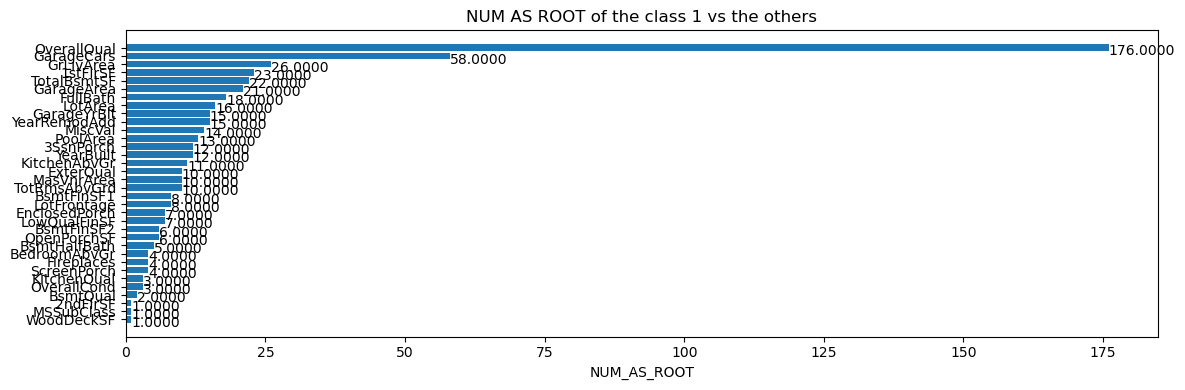

In [76]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [135]:
test_file_path = "../data/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 1s 29ms/step


,Id,SalePrice
0,1461,140694.218750
1,1462,184776.187500
2,1463,191371.890625
3,1464,196358.531250
4,1465,224094.078125


In [136]:
sample_submission_df = pd.read_csv('../data/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('../submissions/submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 26ms/step


,Id,SalePrice
0,1461,140694.218750
1,1462,184776.187500
2,1463,191371.890625
3,1464,196358.531250
4,1465,224094.078125


In [166]:
kaggle competitions submit -c house-prices-advanced-regression-techniques -f work/submissions/submission.csv -m "First try"

SyntaxError: invalid syntax (3924613.py, line 1)